## Set up Colab environment

In [ ]:
!git clone https://github.com/iechevarria/lego-face-VAE

In [ ]:
cd lego-face-VAE

In [ ]:
!unzip dataset.zip

## Sanity test: run the VAE model on MNIST

In [ ]:
from ml.utils import load_mnist
from ml.variational_autoencoder import VariationalAutoencoder

In [ ]:
(x_train, _), (x_test, _) = load_mnist()

In [ ]:
encoder_params = [
    {"filters": 32, "kernel_size": 3, "strides": 1},
    {"filters": 64, "kernel_size": 3, "strides": 2},
    {"filters": 64, "kernel_size": 3, "strides": 2},
    {"filters": 64, "kernel_size": 3, "strides": 1},
]

decoder_params = [
    {"filters": 64, "kernel_size": 3, "strides": 1},
    {"filters": 64, "kernel_size": 3, "strides": 2},
    {"filters": 32, "kernel_size": 3, "strides": 2},
    {"filters": 1, "kernel_size": 3, "strides": 1},
]

vae = VariationalAutoencoder(
    input_dim = (28,28,1),
    latent_dim = 8,
    encoder_params=encoder_params,
    decoder_params=decoder_params,
)

vae.save()

In [ ]:
LEARNING_RATE = 0.0005
BATCH_SIZE = 32

In [ ]:
vae.compile_model(lr=LEARNING_RATE, r_loss_factor=1000)

In [ ]:
vae.train(
    x_train,
    batch_size=BATCH_SIZE,
    epochs=200
)

In [ ]:
plot_reconstructed_images(data=x_test, encoder=vae.encoder_model, decoder=vae.decoder_model)

## Train VAE on Lego faces

In [ ]:
import numpy as np

from ml.utils import load_lego_faces, load_model, morph_images, plot_reconstructed_images 
from ml.variational_autoencoder import VariationalAutoencoder

In [ ]:
lego_face_dict = load_lego_faces(size=64)
lego_faces = np.array(list(lego_face_dict.values()))

In [ ]:
encoder_params = [
    {"filters": 64, "kernel_size": 3, "strides": 1},
    {"filters": 64, "kernel_size": 3, "strides": 2},
    {"filters": 64, "kernel_size": 3, "strides": 2},
    {"filters": 64, "kernel_size": 3, "strides": 2},
    {"filters": 64, "kernel_size": 3, "strides": 1},
]

decoder_params = [
    {"filters": 64, "kernel_size": 3, "strides": 1},
    {"filters": 64, "kernel_size": 3, "strides": 2},
    {"filters": 64, "kernel_size": 3, "strides": 2},
    {"filters": 32, "kernel_size": 3, "strides": 2},
    {"filters": 3, "kernel_size": 3, "strides": 1},
]

vae = VariationalAutoencoder(
    input_dim = (64, 64, 3),
    latent_dim = 200,
    encoder_params=encoder_params,
    decoder_params=decoder_params,
)

vae.save()

In [ ]:
LEARNING_RATE = 0.0005
BATCH_SIZE = 32

In [ ]:
vae.compile_model(lr=LEARNING_RATE, r_loss_factor=10000)

In [ ]:
vae.train(
    lego_faces,
    batch_size=BATCH_SIZE,
    epochs=200
)

## Do the fun stuff with the VAE

In [1]:
import numpy as np
from ml.utils import (
    animate_morph_images,
    load_lego_faces,
    load_model,
    plot_morph_images,
    plot_random_faces,
    plot_reconstructed_images,
)

vae = load_model(path='trained_model')

lego_face_dict = load_lego_faces(size=64)
filenames, lego_faces = zip(*lego_face_dict.items())
lego_faces = np.array(list(lego_faces))

common_kwargs = {
    'encoder': vae.encoder_model,
    'decoder': vae.decoder_model,
}

Using TensorFlow backend.
W0201 23:22:54.810120 10484 deprecation_wrapper.py:119] From c:\users\ivan\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0201 23:22:54.829073 10484 deprecation_wrapper.py:119] From c:\users\ivan\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0201 23:22:54.843033 10484 deprecation_wrapper.py:119] From c:\users\ivan\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0201 23:22:54.855998 10484 deprecation_wrapper.py:119] From c:\users\ivan\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_def

### Reconstruct faces

In [ ]:
plot_reconstructed_images(data=lego_faces, **common_kwargs)

### Generate new faces

In [ ]:
plot_random_faces(vae.decoder_model)
plot_random_faces(vae.decoder_model)
plot_random_faces(vae.decoder_model)
plot_random_faces(vae.decoder_model)

### Do face morphs

In [ ]:
pairs = [
    ('minifigure-03568-03-2003.jpg', 'minifigure-05319-03-2011.jpg'),
    ('minifigure-05317-03-2010.jpg', 'minifigure-01655-03-2010.jpg'),
    ('minifigure-05424-04-2012.jpg', 'minifigure-05283-03-2011.jpg'),
    ('minifigure-01332-02-2010.jpg', 'minifigure-00854-02-1997.jpg'),
    ('minifigure-06287-03-2013.jpg', 'minifigure-01090-03-2009.jpg'),
]

for f1, f2 in pairs:
    plot_morph_images(
        lego_face_dict[f1], 
        lego_face_dict[f2],
        **common_kwargs,
    )

In [ ]:
f1, f2 = pairs[4]
clip = animate_morph_images(
    lego_face_dict[f1], 
    lego_face_dict[f2],
    n_steps=90,
    **common_kwargs,
)
clip.ipython_display(width=400)

### Make t-SNE plots

In [2]:
encodings = np.asarray(vae.encoder_model.predict(lego_faces), dtype=np.float64)

In [3]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

enc_50d = PCA(n_components=50).fit_transform(encodings)
tsne_coords = TSNE(n_components=2).fit_transform(enc_50d)

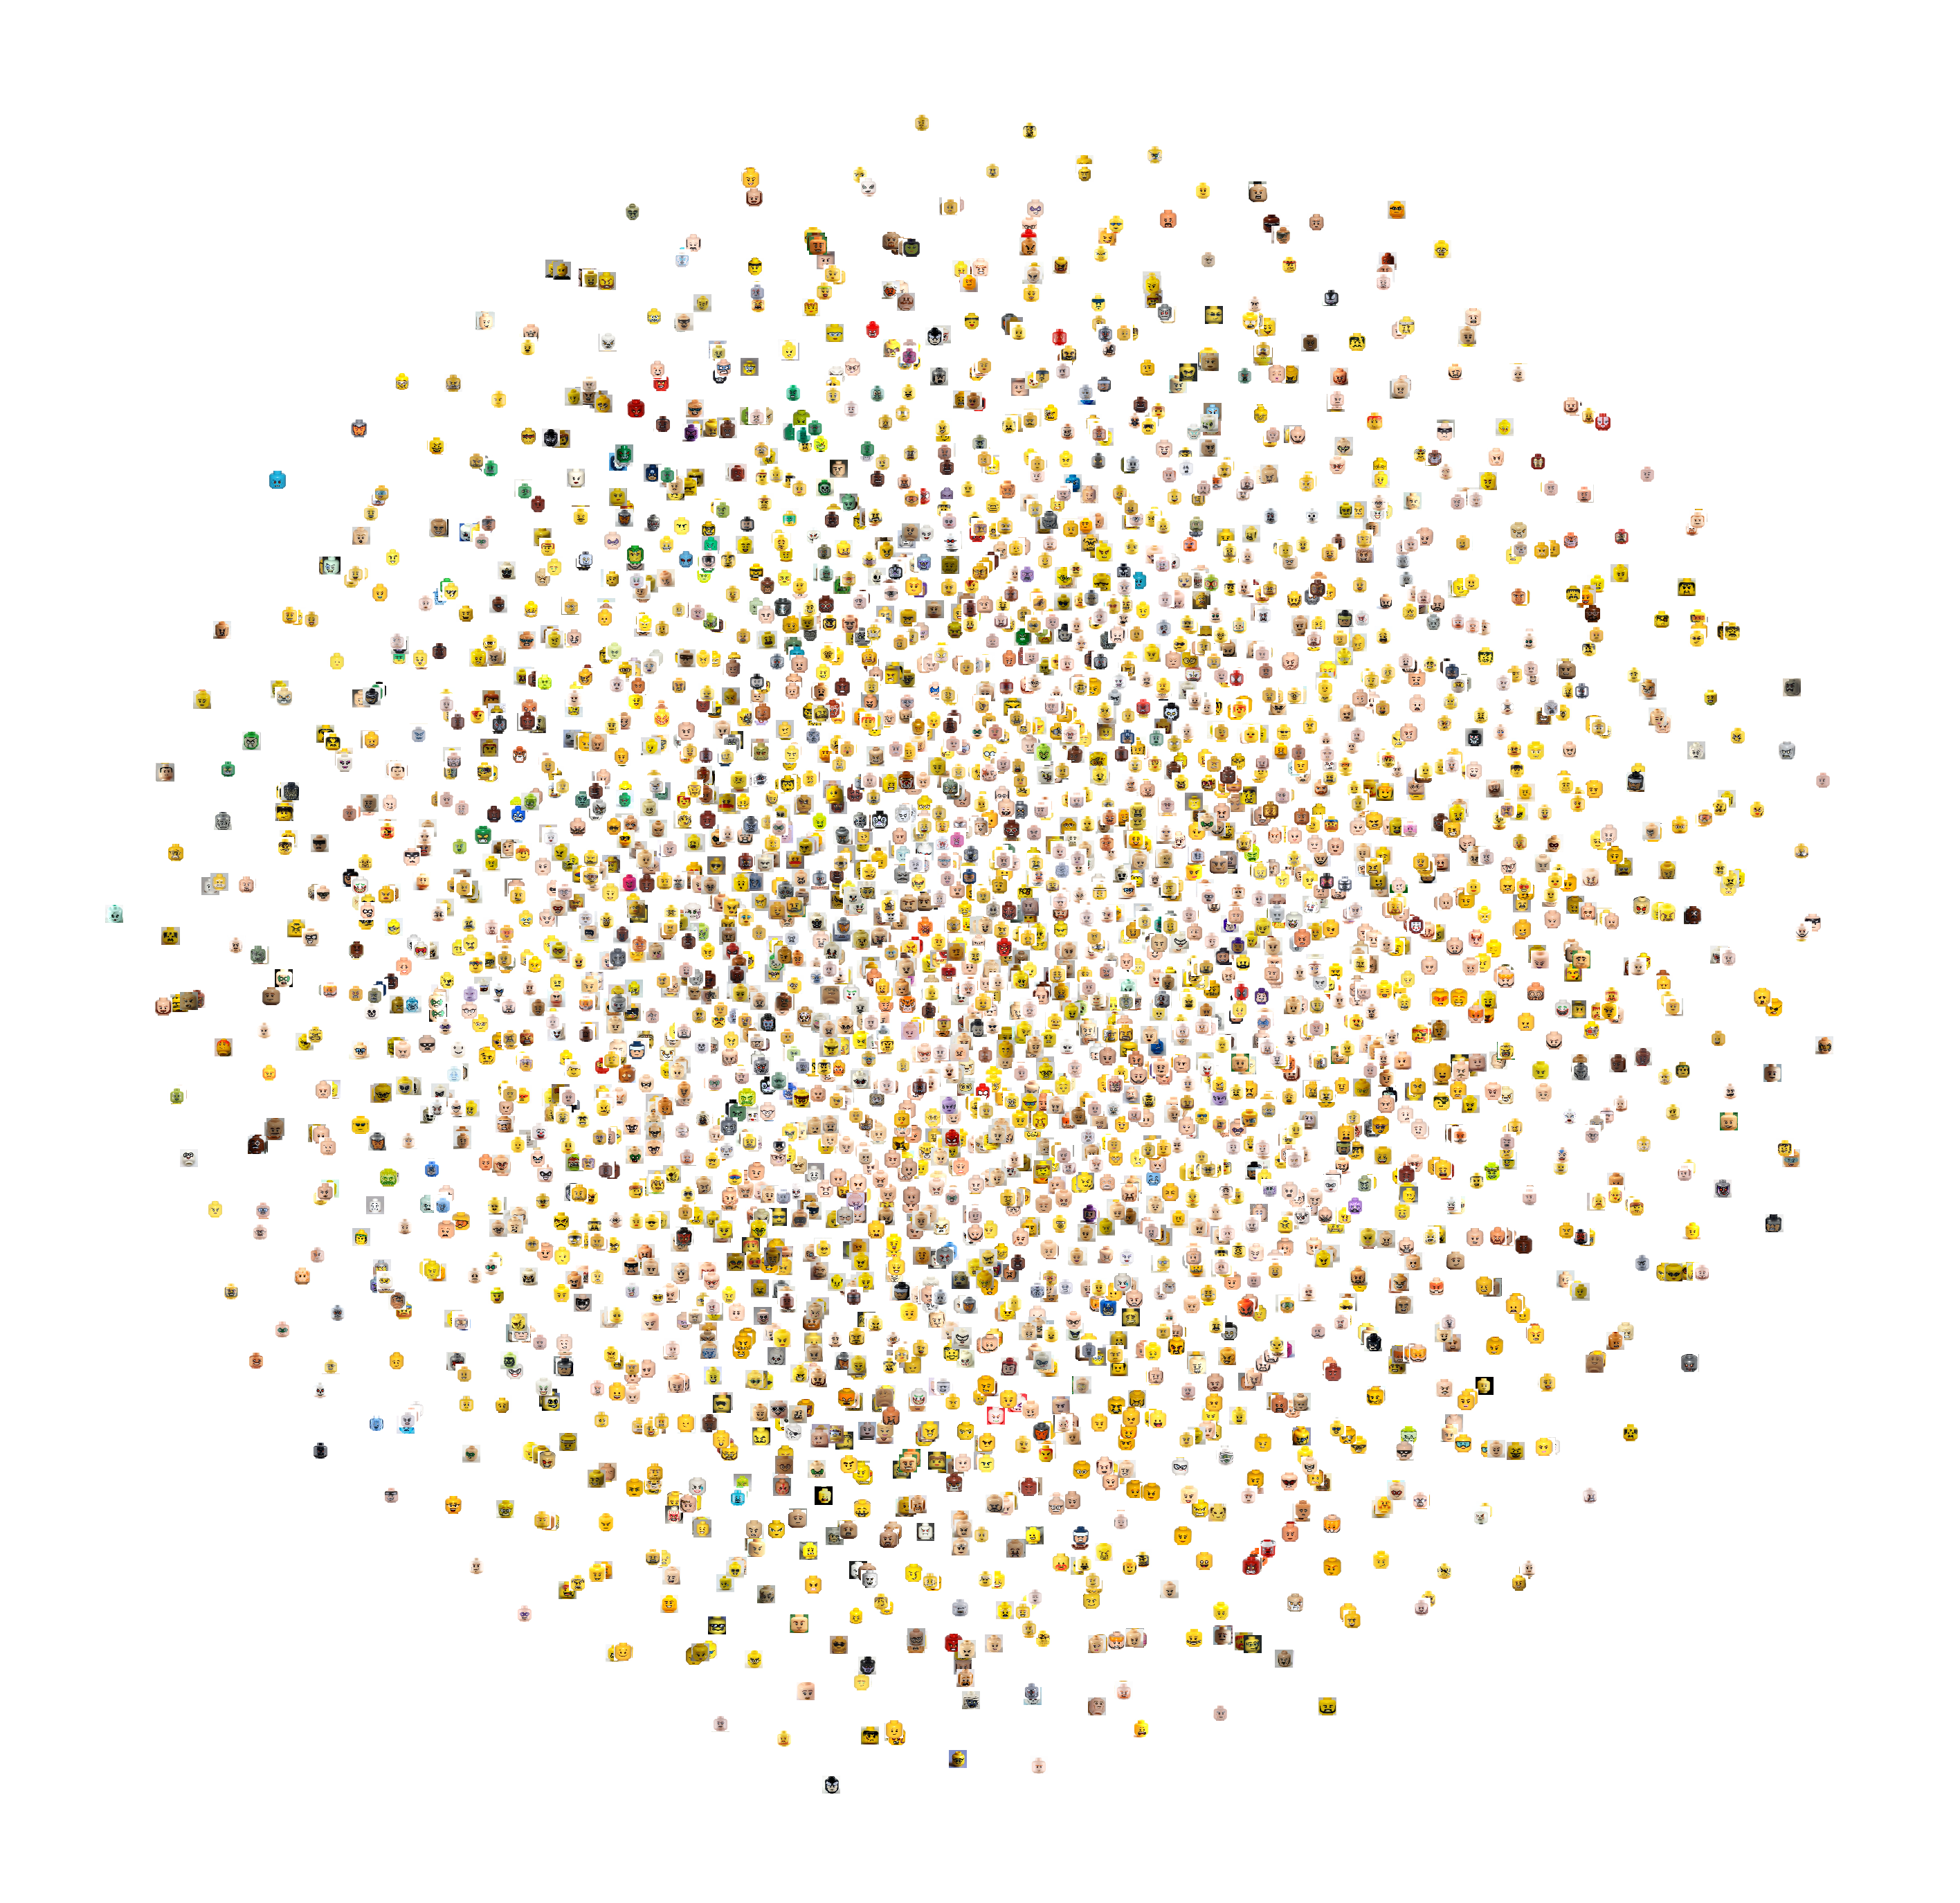

In [4]:
from os.path import join
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

offset = 0
num_to_show = 4000

x_coords, y_coords = list(zip(*tsne_coords[offset:offset + num_to_show]))
relevant_files = filenames[offset:offset + num_to_show]

fig, ax = plt.subplots(figsize=(50, 50))
ax.axis('off')
ax.set_xlim(-50, 50)
ax.set_ylim(-50, 50)

i = 0
for x, y, filename in zip(x_coords, y_coords, relevant_files):
    ab = AnnotationBbox(
        OffsetImage(plt.imread(join('dataset', filename)), zoom=0.2),
        xy=(x, y),
        frameon=False,
    )
    ax.add_artist(ab)
    i += 1

plt.show()